In [16]:
import numpy as np
import matplotlib.pyplot as plt

def BC1(t):
    f=10.
    return f

def BC2(t):
    g=0.
    return g

def IC(x):
    h=0*x
    return h

D = 3.e-2     # Diffusion constant
L = 2         # Length of domain
dx = 0.01     # Grid discretization
dt = 1.0e-3   # Timestep
rt = D*dt/(dx**2) 
T_max = 1     # End time
print(rt)
N=int(L/dx)+1
M=int(T_max/dt)+1
x=np.linspace(0,L,N)
t=np.linspace(0,T_max,M)

AM=(1+2*rt)*np.diag(np.ones(N))
AR=-rt*np.diag(np.ones(N-1),1)
AL=-rt*np.diag(np.ones(N-1),-1)

A=AM+AR+AL
print(A)

A[0,0]=1.
A[-1,-1]=1.
A[0,1]=0.
A[-1,-2]=0.
print(A)
Ainv=np.linalg.inv(A)
u=np.zeros((N,M))
u[:,0]=IC(x)

for j in range(0,M-1):
    b=u[:,j]
    b[0]=BC1(t[j])
    b[-1]=BC2(t[j])
    #u[:,j+1]=np.linalg.solve(A,b)
    u[:,j+1]=Ainv.dot(b)
    

0.3
[[ 1.6 -0.3  0.  ...  0.   0.   0. ]
 [-0.3  1.6 -0.3 ...  0.   0.   0. ]
 [ 0.  -0.3  1.6 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.6 -0.3  0. ]
 [ 0.   0.   0.  ... -0.3  1.6 -0.3]
 [ 0.   0.   0.  ...  0.  -0.3  1.6]]
[[ 1.   0.   0.  ...  0.   0.   0. ]
 [-0.3  1.6 -0.3 ...  0.   0.   0. ]
 [ 0.  -0.3  1.6 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  1.6 -0.3  0. ]
 [ 0.   0.   0.  ... -0.3  1.6 -0.3]
 [ 0.   0.   0.  ...  0.   0.   1. ]]


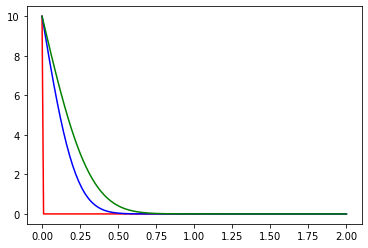

In [17]:
plt.plot(x,u[:,0],'-r',x,u[:,int(M/2)],'-b',x,u[:,M-1],'-g')